# 結果比較

In [89]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [90]:
def discon_flg(df):
    df['discon_flg'] = (df['discon_cnt'] > 0).astype(int)
    return df

In [91]:
# 比較元
BEFORE_CSV = os.path.join('/home', 'jupyter', 'work', 'result', '20230130_0744_connect_base_03_test_stress_main.csv')
before_df = pd.read_csv(BEFORE_CSV)
before_df = discon_flg(before_df)

# 比較先
AFTER_CSV = os.path.join('/home', 'jupyter', 'work', 'result', '20230130_0744_connect_base_03_test_stress_main.csv')
after_df = pd.read_csv(AFTER_CSV)
after_df = discon_flg(after_df)

In [92]:
compare_cols = ['cost', 'discon_flg', 'discon_cnt', 'time']

before_df.columns = [c + '_before' if c in compare_cols else c for c in before_df.columns]

cols = compare_cols.copy()
cols.append('seed')
after_df = after_df[cols]
after_df.columns = [c + '_after' if c in compare_cols else c for c in after_df.columns]

In [93]:
merge_df = pd.merge(before_df, after_df, on=['seed'], how='left')
f = np.isnan(merge_df['cost_after'])
merge_df = merge_df[~f]

In [94]:
print('Disconnected Flg: {}'.format(sum(merge_df['discon_cnt_after'])))

Disconnected Flg: 0


In [95]:
# 辺密度(0.01刻み)
merge_df['edge_density'] = merge_df['M'] / merge_df['N']
merge_df['edge_density'] = round(100  * merge_df['edge_density']) / 100

In [96]:
# スケジュールのタイトさ(0.01刻み)
merge_df['sche_room'] = merge_df['K'] / (merge_df['M'] / merge_df['D'])
merge_df['sche_room'] = round(100  * merge_df['sche_room']) / 100

In [97]:
# 刻み幅の調整
merge_df['N_class'] = merge_df['N'] // 10 * 10
merge_df['M_class'] = merge_df['M'] // 10 * 10

In [99]:
# コスト目標
cost_lb_path = os.path.join('/home', 'jupyter', 'work', '01_testset', '03_test_stress_cost_lb.csv')
cost_lb_df = pd.read_csv(cost_lb_path)

merge_df = pd.merge(merge_df, cost_lb_df[['seed', 'cost_lb']], on='seed')
merge_df['cost_target_rate_before'] = merge_df['cost_before'] / merge_df['cost_lb']
merge_df['cost_target_rate_after'] = merge_df['cost_after'] / merge_df['cost_lb']

## 全体比較(コスト)

In [101]:
def y_plot(y):
    val_list = []
    
    for postfix in ('before', 'after'):
        col = y + '_' + postfix
        
        val = np.mean(merge_df[col])
        val_list.append(val)
        
        print('{}: {:.1f}'.format(postfix, val))
    
    plt.title(y)
    plt.bar(['before', 'after'], val_list);

before: 20904404.3
after: 20904404.3


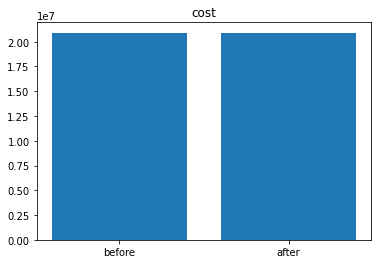

In [102]:
y_plot('cost')

In [103]:
def xy_plot(x, y):
    plot_df = merge_df.groupby(x).mean()
    
    fig = plt.figure()
    ax1 = fig.add_subplot()

    for postfix in ('before', 'after'):
        col = y + '_' + postfix

        ax1.plot(plot_df.index, plot_df[col], label=postfix)

    plt.title(y)
    plt.xlabel(x)
    
    ax2 = ax1.twinx()
    ax2.hist(merge_df[x], alpha=0.3)
    ax2.set_ylim([0, 5000])
    
    ax1.legend();

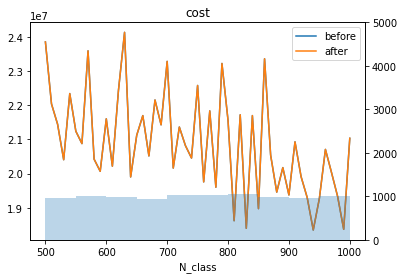

In [104]:
xy_plot('N_class', 'cost')

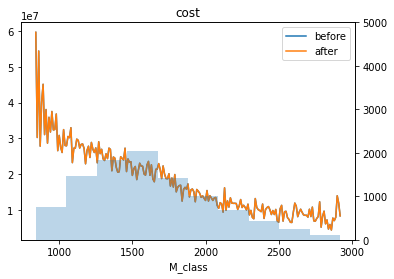

In [105]:
xy_plot('M_class', 'cost')

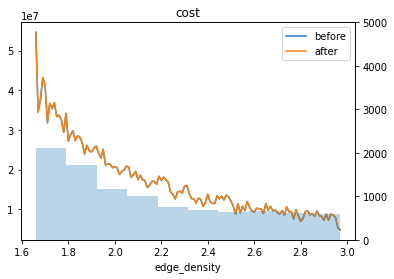

In [106]:
xy_plot('edge_density', 'cost')

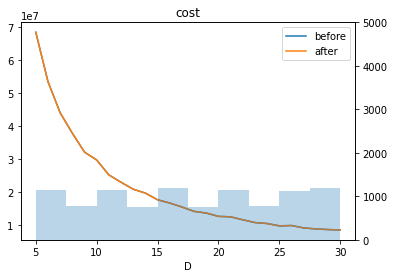

In [107]:
xy_plot('D', 'cost')

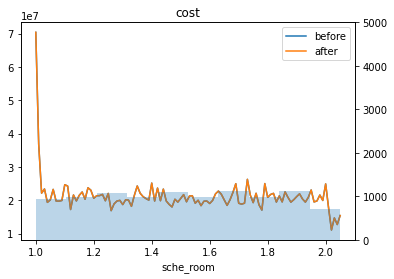

In [108]:
xy_plot('sche_room', 'cost')

## コスト目標比率

before: 1.1
after: 1.1


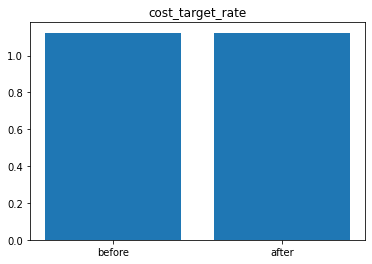

In [109]:
y_plot('cost_target_rate')

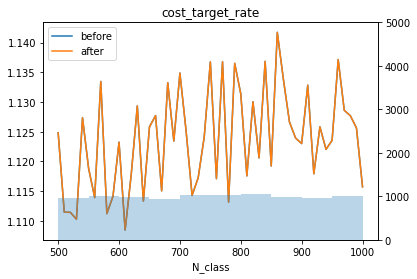

In [110]:
xy_plot('N_class', 'cost_target_rate')

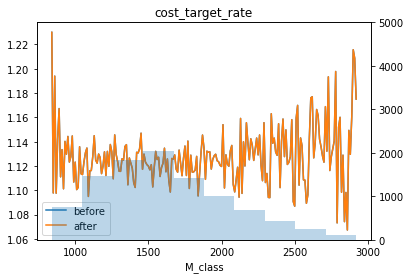

In [111]:
xy_plot('M_class', 'cost_target_rate')

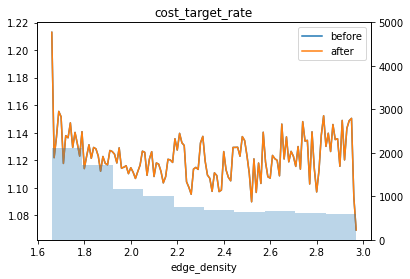

In [112]:
xy_plot('edge_density', 'cost_target_rate')

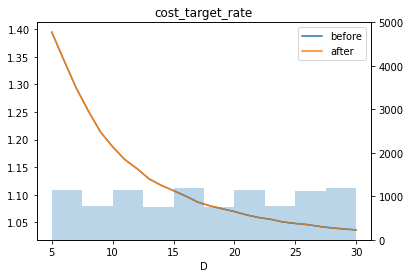

In [113]:
xy_plot('D', 'cost_target_rate')

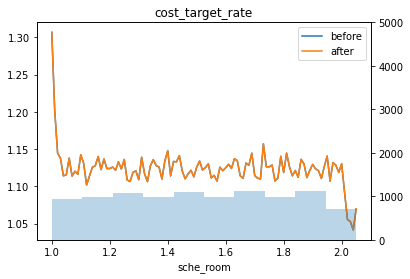

In [114]:
xy_plot('sche_room', 'cost_target_rate')